In [22]:
%load_ext autoreload
%autoreload 2
import os, sys
import pathlib
import json
import numpy as np
import pandas as pd

# grf_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../dataset/pandas/AB06_10_09_18_GRF.pkl")
# imu_sample = os.path.join(pathlib.Path.home(),os.getcwd(),"../dataset/pandas/AB06_10_09_18_IMU.pkl")
imu_sample = '/media/champagne/lower_limb_dataset/v2/AB06_10_09_18_IMU.pkl'
grf_sample = imu_sample.replace('IMU','GRF')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
imu_data = pd.read_pickle(imu_sample)
grf_data = pd.read_pickle(grf_sample)
# columns = imu_data.columns.tolist() + grf_data.columns.tolist()
# assert set(columns) == set(combined_data.columns.tolist())
# for i in range(0, len(columns), 10):
#     print(columns[i:i+10])
# print("combined_data.shape", combined_data.shape)
# colms = combined_data.columns.tolist()
# for i in range(0, len(colms), 10):
#     print(colms[i:i+10])

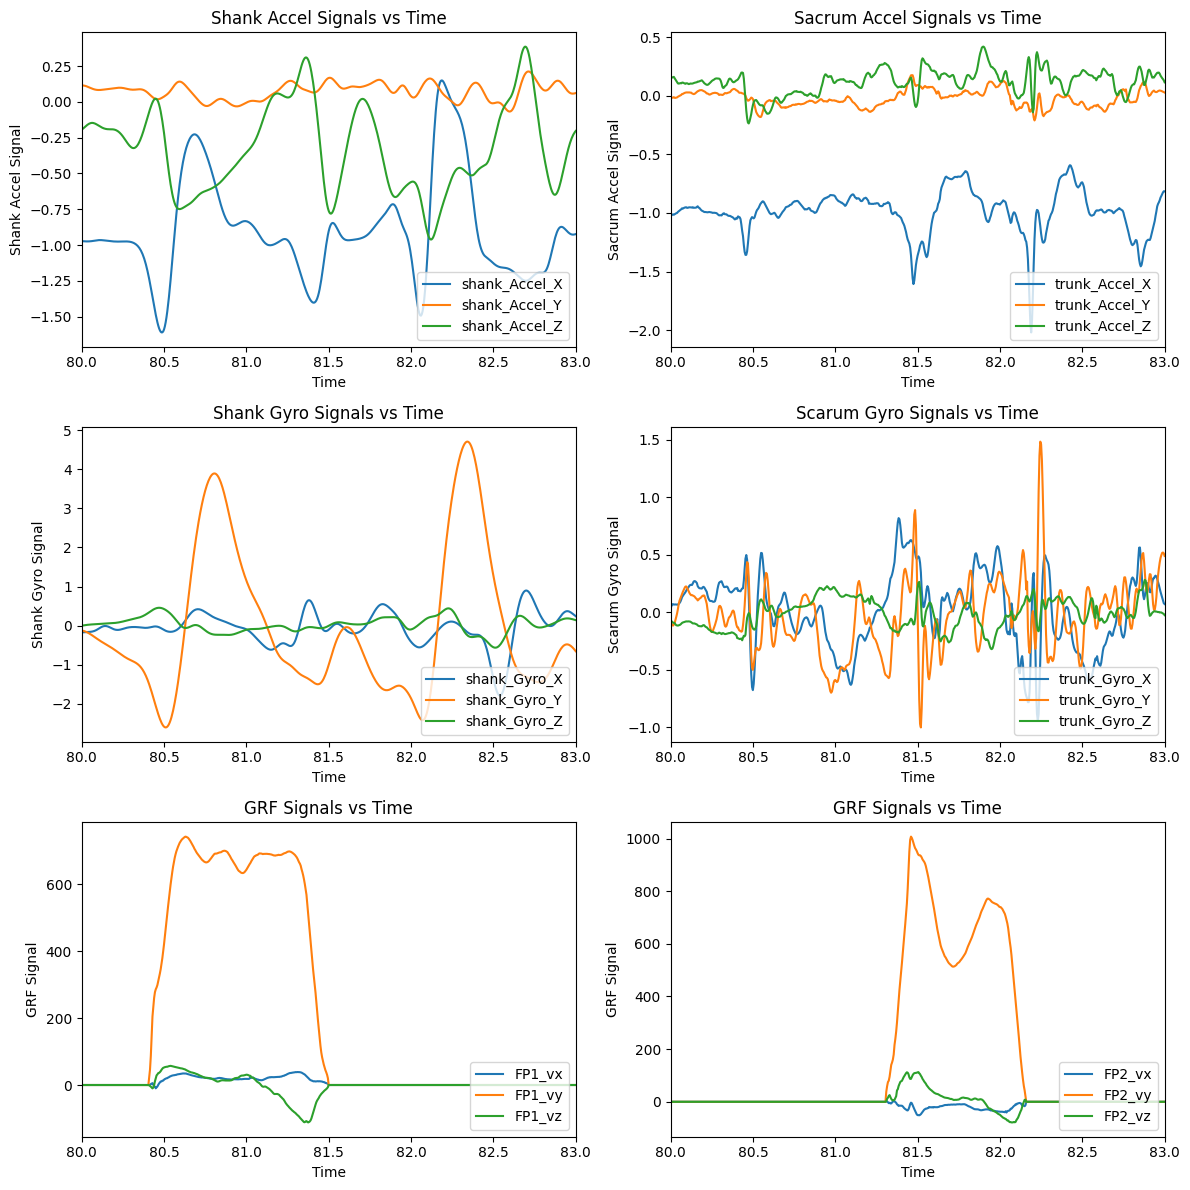

In [24]:
import itertools
import re
import matplotlib.pyplot as plt

def plot_filtered_signals(ax, data, start_time=None, end_time=None, locomotion:str=None, include_columns:list=['shank_.*'], ignore_columns:list=['.*session'], title_prefix:str=None):
    """
    Plots filtered signals from the given data between start_time and end_time.
    
    Parameters:
    - data: pandas DataFrame containing the signals.
    - start_time: float, start time for filtering the data.
    - end_time: float, end time for filtering the data.
    - locomotion: list, locomotion modes to filter the data.
    - include_columns: list, patterns of columns to include in the plot.
    - ignore_columns: list, patterns of columns to ignore in the plot.
    - title_prefix: str, prefix for the plot titles.
    """
    # Filter the data to show time between start_time and end_time
    data_filtered = data
    if start_time:
        data_filtered = data_filtered[data_filtered.index >= start_time]
    if end_time:
        data_filtered = data_filtered[data_filtered.index <= end_time]
    if locomotion:
        data_filtered = data_filtered[data_filtered['locomotion_mode'] == locomotion]
    
    # consider the first session only
    session_columns = data_filtered.columns[data_filtered.columns.str.contains('session')]
    unique_sessions = {session_column: [x for x in data_filtered[session_column].unique() if isinstance(x,str)] for session_column in session_columns}
    session_to_keep = {session_column: unique_sessions[session_column][0] for session_column in unique_sessions}
    data_filtered = data_filtered[
        (data_filtered['session'] == session_to_keep['session']) | 
        ('gcLeft_session' in data_filtered.columns and data_filtered['gcLeft_session'] == session_to_keep['session']) | 
        ('gcRight_session' in data_filtered.columns and data_filtered['gcRight_session'] == session_to_keep['session'])
    ]

    columns_to_plot = []
    for pattern in include_columns:
        columns_to_plot.extend([col for col in data_filtered.columns if re.match(pattern, col)])
    
    # Remove columns that match ignore patterns
    for pattern in ignore_columns:
        columns_to_plot = [col for col in columns_to_plot if not re.match(pattern, col)]

    start_time, end_time = min(data_filtered.index), max(data_filtered.index)

    # Plot filtered signals vs time
    for column in columns_to_plot:
        ax.plot(data_filtered[column], label=column)
        ax.set_title(f'{title_prefix} Signals vs Time')
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{title_prefix} Signal')
        ax.set_xlim([start_time, end_time])
    # Move legend to the right, outside the plot
    ax.legend(loc='lower right')


# Plot filtered GRF signals
# plot_filtered_signals(imu_data, 99, 100, locomotion='treadmill', sensor_columns=sensor_columns, title_prefix='Filtered GRF')
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
# Plot filtered IMU signals
plot_filtered_signals(ax[0,0],imu_data, 80,83, locomotion='stair', include_columns=['shank_Accel_.*'],title_prefix='Shank Accel')#,'thigh_Accel_.*','foot_Accel_.*'])
plot_filtered_signals(ax[0,1],imu_data, 80,83, locomotion='stair', include_columns=['trunk_Accel_.*'],title_prefix='Sacrum Accel')#,'thigh_Gyro_.*','foot_Gyro_.*'])
plot_filtered_signals(ax[1,0],imu_data, 80,83, locomotion='stair', include_columns=['shank_Gyro_.*'],title_prefix='Shank Gyro')
plot_filtered_signals(ax[1,1],imu_data, 80,83, locomotion='stair', include_columns=['trunk_Gyro_.*'],title_prefix='Scarum Gyro')
plot_filtered_signals(ax[2,0],grf_data, 80,83, locomotion='stair', include_columns=['FP1_v.*'], ignore_columns=['.*_moment_.*'],title_prefix='GRF')
plot_filtered_signals(ax[2,1],grf_data, 80,83, locomotion='stair', include_columns=['FP2_v.*'], ignore_columns=['.*_moment_.*'],title_prefix='GRF')

plt.tight_layout()

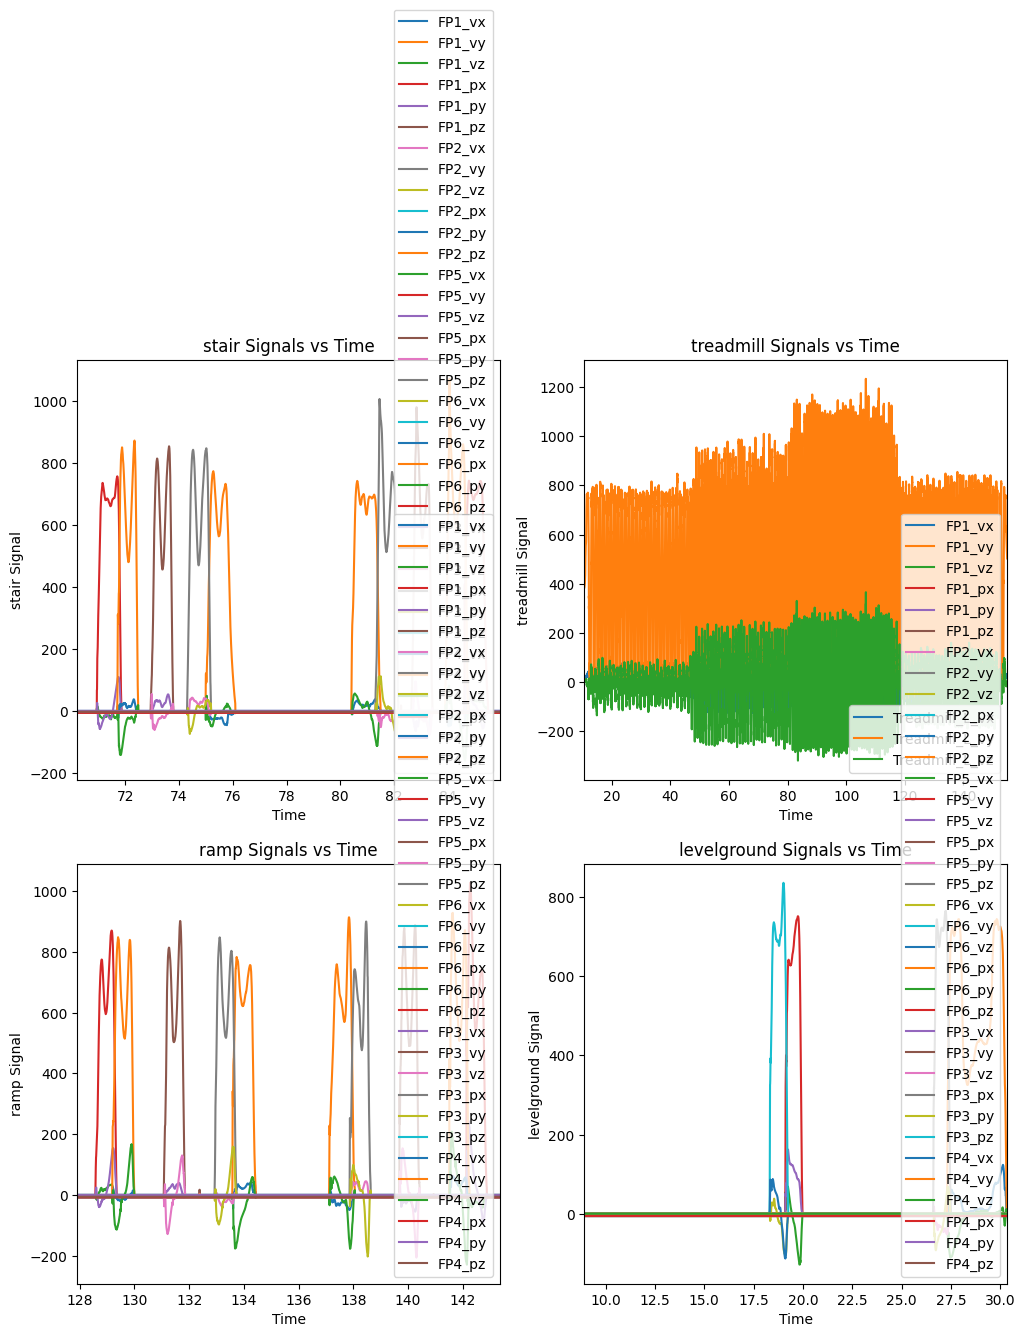

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
# Plot GRFs for all actions
plot_filtered_signals(ax[0,0],grf_data, locomotion='stair', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='stair')
plot_filtered_signals(ax[0,1],grf_data, locomotion='treadmill', include_columns=['Treadmill_L_v.*'], ignore_columns=[],title_prefix='treadmill')
plot_filtered_signals(ax[1,0],grf_data, locomotion='ramp', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='ramp')
plot_filtered_signals(ax[1,1],grf_data, locomotion='levelground', include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='levelground')
# plot_filtered_signals(ax[2,0],grf_data,  include_columns=['FP.*'], ignore_columns=['.*_moment_.*'],title_prefix='FP')
# plot_filtered_signals(ax[2,1],grf_data,  include_columns=['Combined_v.*'], title_prefix='Combined')

IMU data time range: (11.99, 155.045), GRF data time range: (11.99, 155.045), IMU data shape: (40058, 33), GRF data shape: (28612, 84)
Index(['shank_Accel_X', 'shank_Accel_Y', 'shank_Accel_Z', 'shank_Gyro_X',
       'shank_Gyro_Y', 'shank_Gyro_Z', 'trunk_Accel_X', 'trunk_Accel_Y',
       'trunk_Accel_Z', 'trunk_Gyro_X', 'trunk_Gyro_Y', 'trunk_Gyro_Z',
       'gcLeft_HeelStrike', 'gcRight_HeelStrike', 'Treadmill_R_vx',
       'Treadmill_R_vy', 'Treadmill_R_vz', 'Treadmill_L_vx', 'Treadmill_L_vy',
       'Treadmill_L_vz'],
      dtype='object')


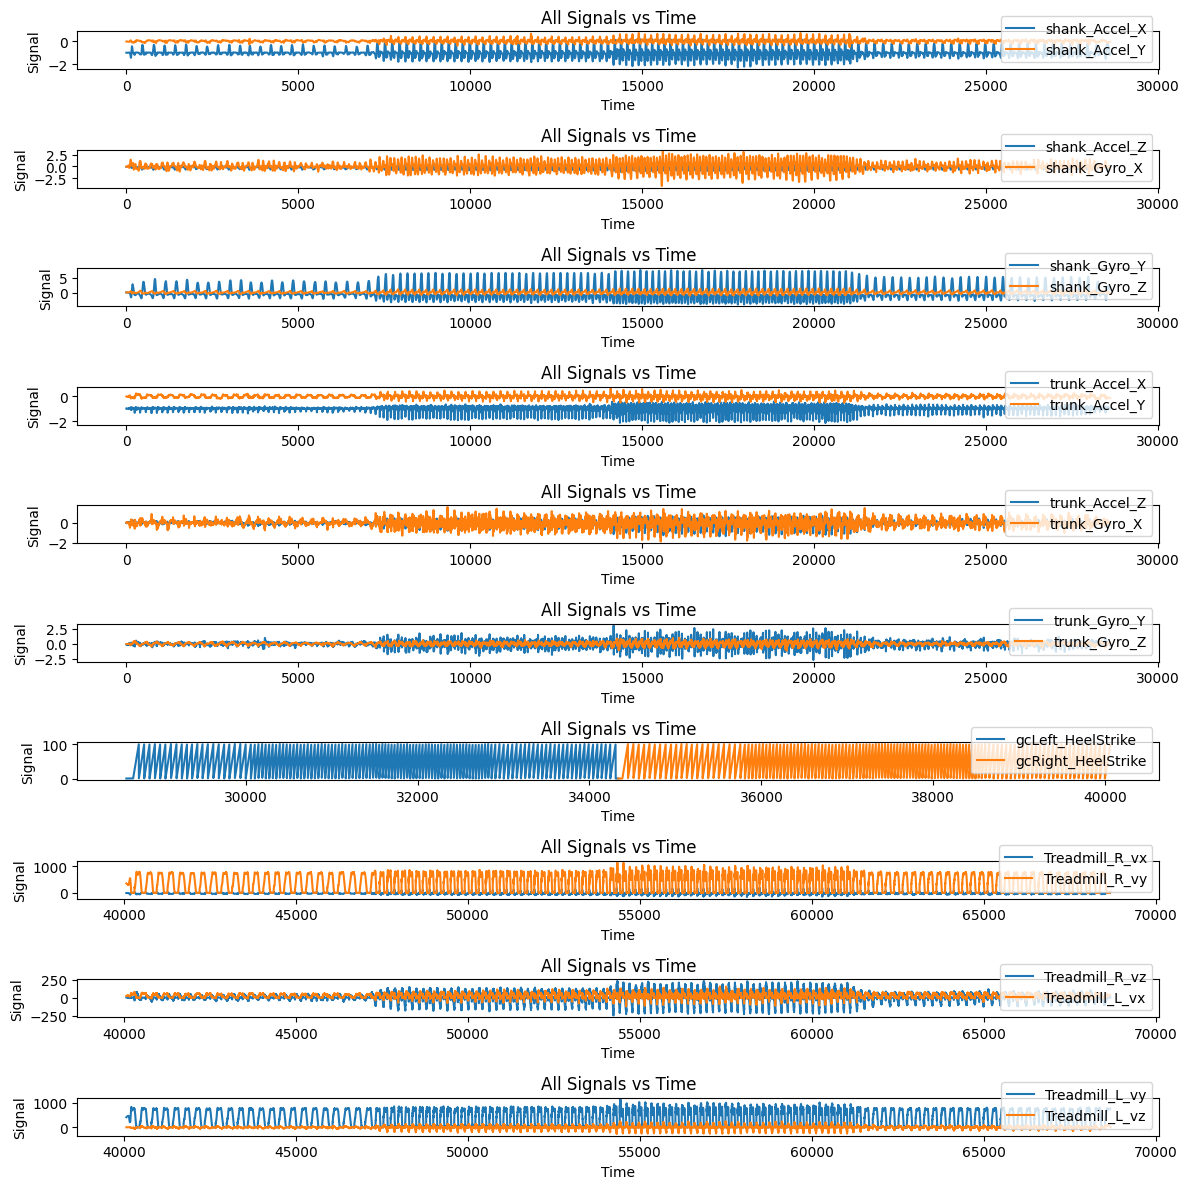

In [26]:
#create a function to get the IMU and GRF data for a specific session for a specific locomotion
def get_data_for_session(imu_data, grf_data, session, locomotion='treadmill', include_imu_columns=['shank_', 'trunk_','_HeelStrike'], include_grf_columns=['Treadmill_L_v','Treadmill_R_v']):
    # print sesssions, if the session is not in the data.
    if session not in imu_data['session'].unique():
        print(f"Session {session} not found in the IMU data. Available sessions: {imu_data['session'].unique()}")
    if session not in grf_data['session'].unique():
        print(f"Session {session} not found in the GRF data. Available sessions: {grf_data['session'].unique()}")

    imu_data_filtered = imu_data[(imu_data['session'] == session) |
                                 (imu_data['gcLeft_session'] == session) | 
                                 (imu_data['gcRight_session'] == session) & 
                                 (imu_data['locomotion_mode'] == locomotion)]
    grf_data_filtered = grf_data[(grf_data['session'] == session) & 
                                 (grf_data['locomotion_mode'] == locomotion)]

    range_index = lambda data: (min(data.index), max(data.index))
    print(f"IMU data time range: {range_index(imu_data_filtered)}, GRF data time range: {range_index(grf_data_filtered)}, IMU data shape: {imu_data_filtered.shape}, GRF data shape: {grf_data_filtered.shape}")
    # combine the data
    data = pd.concat([imu_data_filtered, grf_data_filtered], axis=0)
    # data = pd.merge(imu_data_filtered, grf_data_filtered, left_index=True, right_index=True, suffixes=('_imu', '_grf'))
    # print(f"Combined data time range: {range_index(data)}, Combined data shape: {data.shape}")
    # # Filter the columns to include only the specified columns
    imu_columns_to_include = [col for col in imu_data_filtered.columns if any([pattern in col for pattern in include_imu_columns])]
    grf_columns_to_include = [col for col in grf_data_filtered.columns if any([pattern in col for pattern in include_grf_columns])]
    data = data[imu_columns_to_include + grf_columns_to_include]
    return data
    # return imu_data_filtered[imu_columns_to_include], grf_data_filtered[grf_columns_to_include]

# break an array into n segments, take a fixed number of elements from each segment from the middle.
def segment_data(data, n_segments, n_elements):
    segment_size = len(data) // n_segments
    segmented_data = []
    for i in range(n_segments):
        segment = data[i*segment_size:(i+1)*segment_size]
        middle_index = len(segment) // 2
        start_index = max(0, middle_index - n_elements // 2)
        end_index = start_index + n_elements
        segmented_data.append(segment[start_index:end_index])
    return np.asarray(segmented_data)
    
from scipy.signal import find_peaks
def grf_step_segmentation(data, window_size=50,
                      n_speeds=4, n_steps=10,
                      indicator_l='gcLeft_HeelStrike', indicator_r='gcRight_HeelStrike', 
                      left_columns=['Treadmill_L_v'], right_columns=['Treadmill_R_v']):
    assert len(left_columns) == len(right_columns)
    segmented_data = np.zeros((n_speeds, 2* len(left_columns), n_steps, 3, window_size))
    
    # Find heel strike events
    heel_strikes_l,_ = find_peaks(data[indicator_l])
    heel_strikes_r,_ = find_peaks(data[indicator_r])

    heel_strikes_l = segment_data(heel_strikes_l, n_speeds, n_steps)
    heel_strikes_r = segment_data(heel_strikes_r, n_speeds, n_steps)

    # include 5 time points before the heel strike
    heel_strikes_l,heel_strikes_r = heel_strikes_l - 1, heel_strikes_r - 1

    # ldiff = np.diff(heel_strikes_l, axis=1)
    rdiff = np.diff(heel_strikes_r, axis=1)
    # mean_l_diff = np.mean(ldiff,axis=1).astype(int) - 2
    mean_r_diff = int(np.mean(rdiff,axis=1)) - 2

    for speed_idx in range(n_speeds):
        for leg_idx, leg in enumerate(left_columns + right_columns):
            for step_idx in range(n_steps):
                for dim_idx, dim in enumerate(['x', 'y', 'z']):
                    col = f"{leg}{dim}"
                    idx = heel_strikes_l[speed_idx][step_idx]
                    segment = data[col].iloc[idx:idx + min(window_size,mean_r_diff[speed_idx])].tolist()
                    # pad the segment with zeros if it is shorter than the window size
                    if len(segment) < window_size:
                        segment += [0] * (window_size - len(segment))
                    segmented_data[speed_idx,leg_idx,step_idx,dim_idx] = segment
    # 1 person, 4 speeds, 2 legs, 2 signals, 15 steps, 3 dimentions, time window (35-65)
    return segmented_data

# Get the data for a specific session and locomotion
session = 'treadmill_01_01'


data = get_data_for_session(imu_data, grf_data, session)
  

def plot_all_signals(data):
    fig, axs = plt.subplots(len(data.columns)//2, 1, figsize=(12, 12))
    for i in range(len(axs)):
        for j in range(2):
            col_idx = i * 2 + j
            if col_idx < len(data.columns):
                
                axs[i].plot(data.iloc[:, col_idx].values, label=data.columns[col_idx])
                # for strike in raw_strikes:
                #     axs[i].axvline(x=data.index[strike], color='r', linestyle='--', linewidth=0.5)
        axs[i].set_title('All Signals vs Time')
        axs[i].set_xlabel('Time')
        # axs[i].set_xlim(0,70000)
        axs[i].set_ylabel('Signal')
        axs[i].legend(loc='lower right')
    plt.tight_layout()

print(data.columns)
plot_all_signals(data)


(4, 4, 10, 3, 400)
(4, 1, 10, 3, 400)


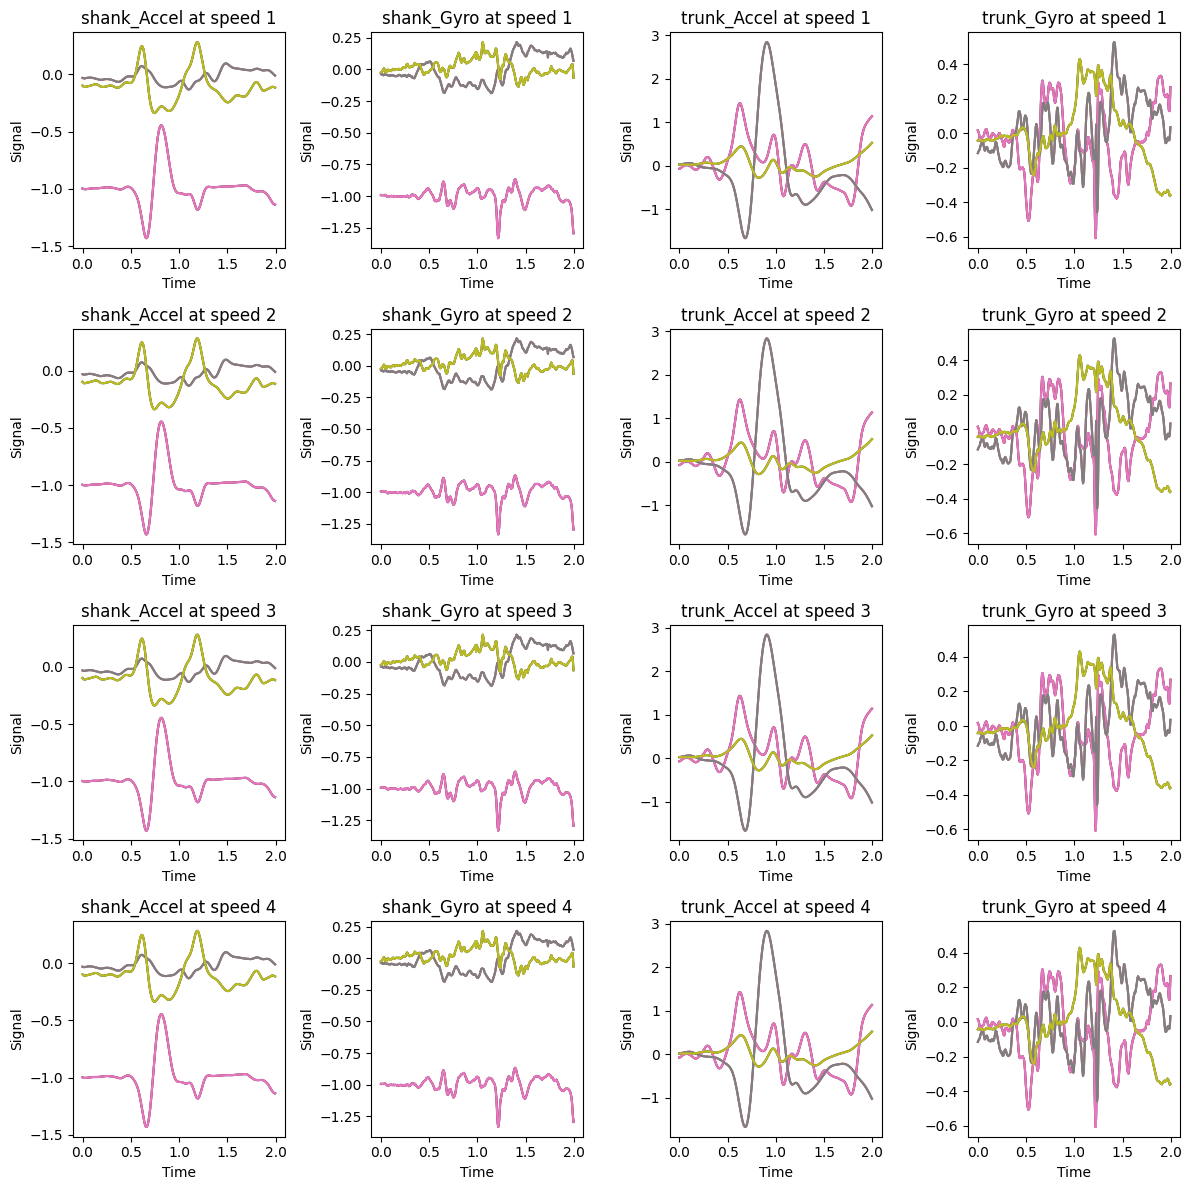

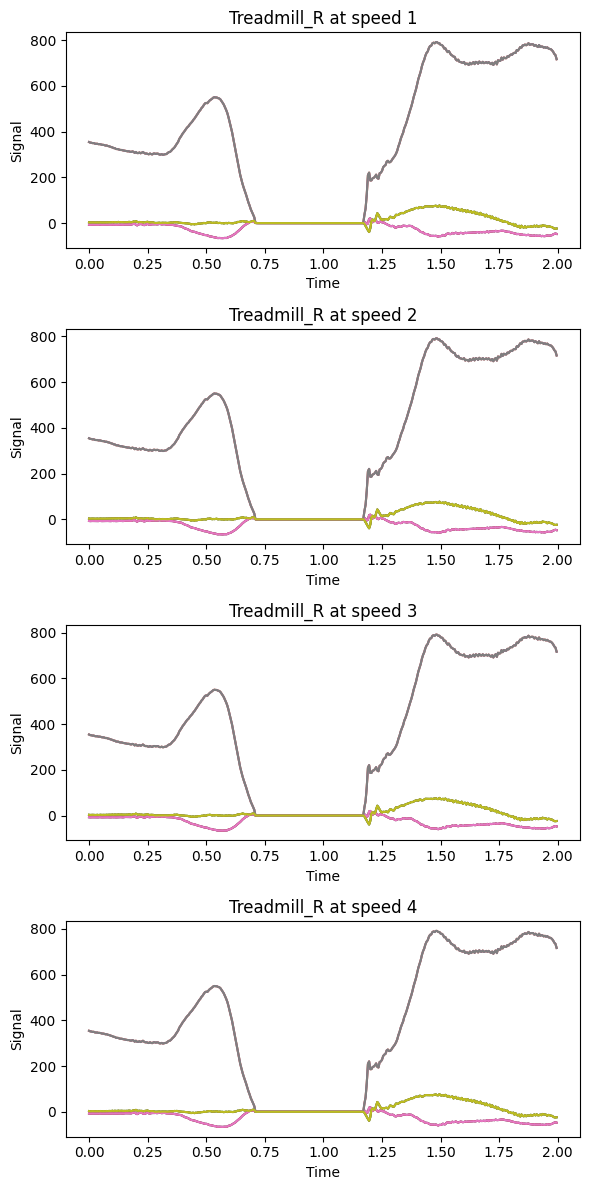

In [35]:
def step_segmentation(data,window_size=220,
                      n_speeds=4, n_steps=10,
                      indicator='gcRight_HeelStrike', 
                      include_columns=['shank_Accel_','trunk_Accel_','shank_Gyro_','trunk_Gyro_'],
                      dims=['X','Y','Z'], post_padding=False):
    # since the dataset only has right leg instrumented, we will only use the right leg data
    segmented_data = np.zeros((n_speeds, len(include_columns), n_steps, 3, window_size))
    
    # Find heel strike events
    heel_strikes,_ = find_peaks(data[indicator])

    heel_strikes = segment_data(heel_strikes, n_speeds, n_steps)
    # include 5 time points before the heel strike
    heel_strikes = heel_strikes - 1

    diff = np.diff(heel_strikes, axis=1)
    mean_diff = np.mean(diff,axis=1).astype(int) - 2

    for speed_idx in range(n_speeds):
        for col_idx, col in enumerate(include_columns):
            for step_idx in range(n_steps):
                for dim_idx, dim in enumerate(dims):
                    idx = heel_strikes[speed_idx][step_idx]
                    ts = data[f"{col}{dim}"].index[idx]
                    # Find the closest index to ts
                    closest_idx = np.argmin(np.abs(data[f"{col}{dim}"].dropna().index.to_numpy()) - ts)
                    # if post_padding:
                    #     segment = data[f"{col}{dim}"].dropna().iloc[closest_idx:closest_idx + min(window_size,mean_diff[speed_idx])].tolist()
                    #     if len(segment) < window_size:
                    #         segment += [0] * (window_size - len(segment))
                    # else:
                    segment = data[f"{col}{dim}"].dropna().iloc[closest_idx:closest_idx + window_size].tolist()
                    segmented_data[speed_idx,col_idx,step_idx,dim_idx] = segment
    # 1 person, 4 speeds, 4 signals, 15 steps, 3 dimentions, time window
    return segmented_data

window_size = 400
segmented_imus = step_segmentation(data, window_size=window_size)
print(segmented_imus.shape)

t_ax = np.arange(window_size)*1/200
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        for k in range(3):
            col_idx = j * 3
            axs[i,j].plot(t_ax,segmented_imus[i,j,k,:].T, label=data.columns[col_idx:col_idx+3])
            axs[i,j].set_title(f'{data.columns[col_idx][:-2]} at speed {i+1}')
            axs[i,j].set_xlabel('Time')
            axs[i,j].set_ylabel('Signal')
            # axs[i,j].legend(loc='lower right')
plt.tight_layout()

segmented_grfs = step_segmentation(data, window_size=window_size, indicator='gcRight_HeelStrike', include_columns=['Treadmill_R_v'], dims=['x','y','z'])
print(segmented_grfs.shape) 

fig, axs = plt.subplots(4, 1, figsize=(6, 12))
for i in range(4):
    for k in range(3):
        axs[i].plot(t_ax,segmented_grfs[i,0,k,:].T, label=data.columns[-6:-3])
        axs[i].set_title(f'{data.columns[-6][:-3]} at speed {i+1}')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Signal')
plt.tight_layout()


raw_strikes: [34447 34511 34573 34636 34698 34760 34822 34886 34949 35010 35070 35131
 35191 35252 35315 35379 35442 35503 35565 35630 35692 35755 35807 35851
 35893 35935 35977 36018 36058 36099 36139 36180 36220 36262 36302 36344
 36384 36425 36466 36507 36546 36587 36627 36667 36707 36747 36787 36826
 36866 36906 36946 36986 37026 37066 37107 37147 37186 37222 37259 37295
 37331 37367 37403 37439 37474 37510 37546 37582 37618 37655 37691 37728
 37764 37800 37836 37872 37908 37944 37980 38017 38053 38090 38126 38163
 38200 38236 38272 38309 38345 38381 38417 38453 38489 38526 38562 38605
 38651 38700 38750 38799 38849 38899 38948 38997 39046 39096 39147 39196
 39244 39294 39343 39393 39442 39492 39541 39590 39639 39689 39739 39789
 39839 39887 39938 39995]
raw_strikes times: Index([  14.79,   16.39,   17.94,  19.515,  21.065,  22.615,  24.165,  25.765,
         27.34,  28.865,
       ...
        142.14, 143.365,  144.59,  145.84,  147.09,  148.34,  149.59,  150.79,
       152.065,  1

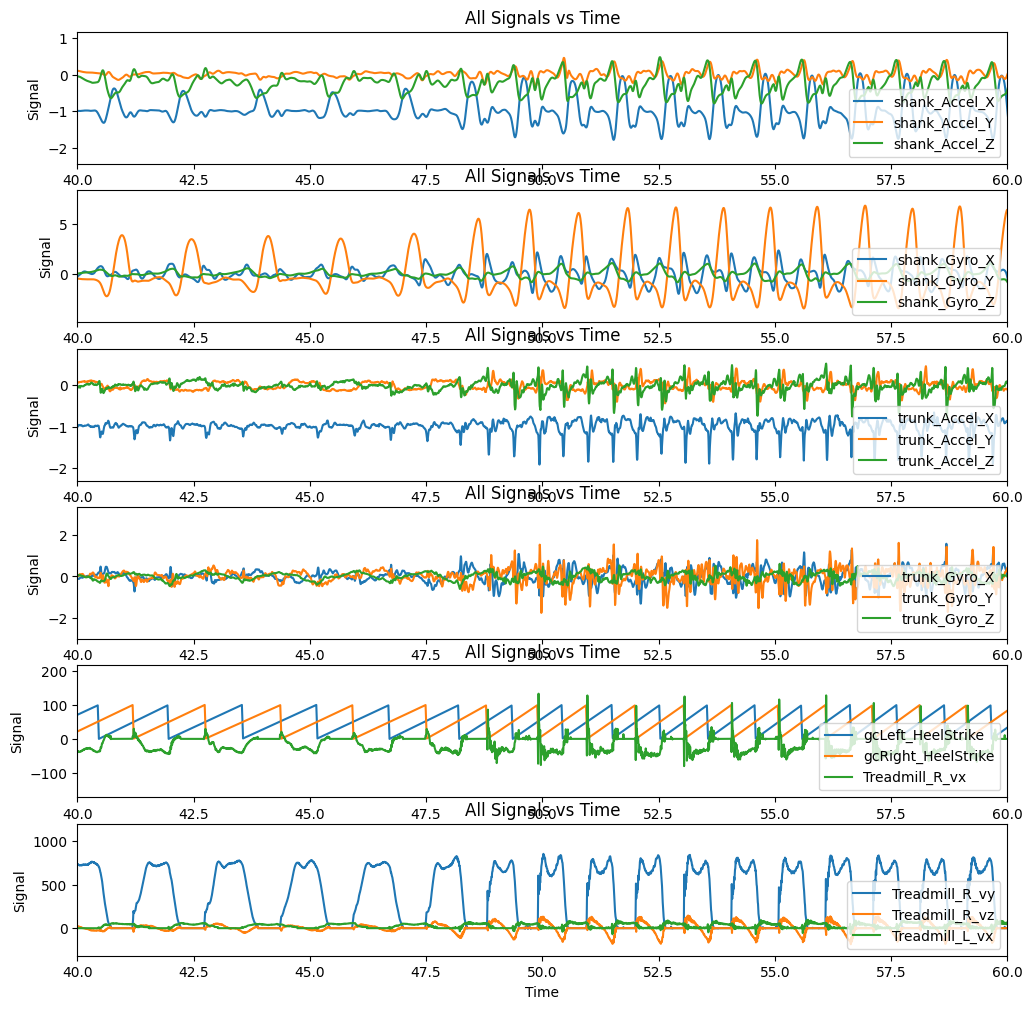

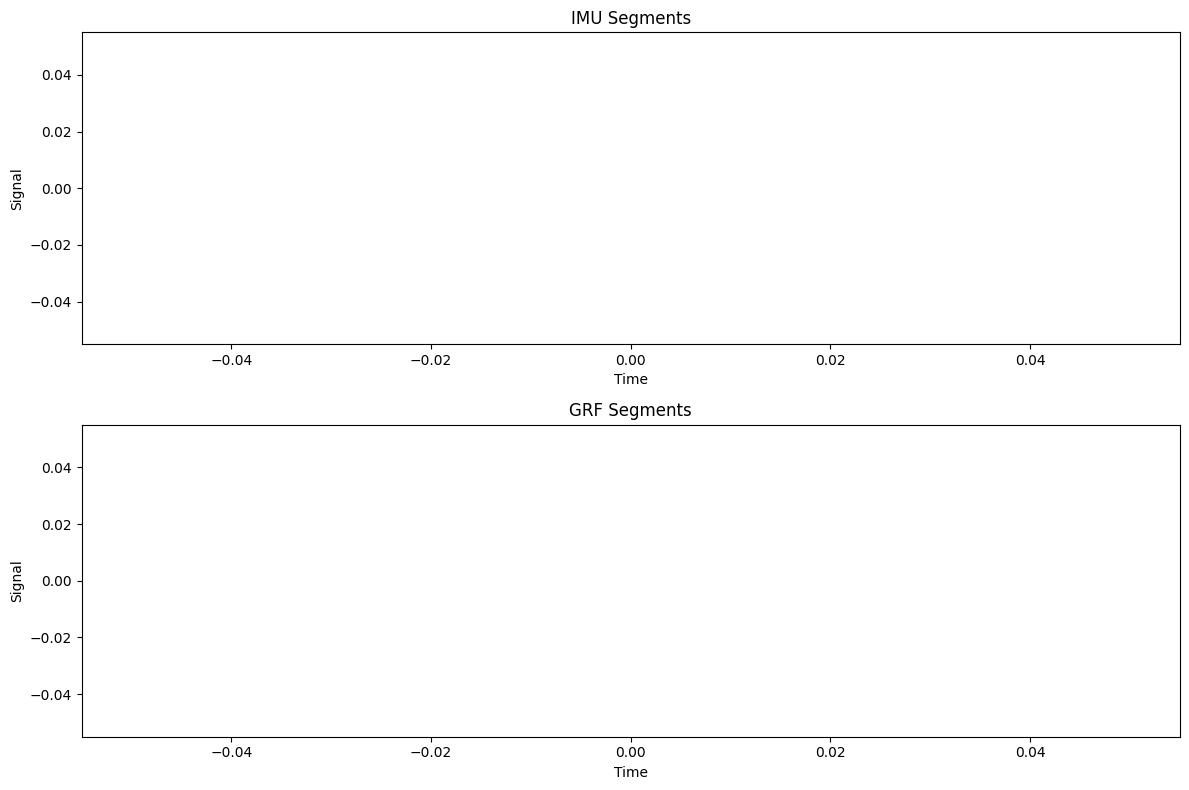

In [32]:
raw_strikes,_ = find_peaks(data['gcRight_HeelStrike'])
print(f"raw_strikes: {raw_strikes}")
print(f"raw_strikes times: {data.index[raw_strikes]}")

fig, axs = plt.subplots(len(data.columns)//3, 1, figsize=(12, 12))
for i in range(len(axs)):
    for j in range(3):
        col_idx = i * 3 + j
        if col_idx < len(data.columns):
            axs[i].plot(data.iloc[:, col_idx], label=data.columns[col_idx])
            # for strike in raw_strikes:
            #     axs[i].axvline(x=data.index[strike], color='r', linestyle='--', linewidth=0.5)
    axs[i].set_title('All Signals vs Time')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Signal')
    axs[i].set_xlim(40,60)
    axs[i].legend(loc='lower right')

def segmentation(data,signal_list,start_idx,window_size=50):
    segmented_data = np.zeros((len(signal_list),len(start_idx),window_size))
    for i,signal in enumerate(signal_list):
        for j,idx in enumerate(start_idx):
            segment = data.iloc[idx:idx + window_size,i].tolist()
            print(f"segment: {signal,data[signal].shape} {idx}:{idx + window_size}")
            segmented_data[i,j] = segment
    return segmented_data

imu_seg = segmentation(data,['shank_Accel_X','shank_Accel_Y','shank_Accel_Z'],raw_strikes,window_size=50)
grf_seg = segmentation(data,['Treadmill_R_vx','Treadmill_R_vy','Treadmill_R_vz'],raw_strikes,window_size=50)

def plot_segments(ax, segments, title_prefix):
    for i in range(segments.shape[0]):
        for j in range(segments.shape[1]):
            ax.plot(segments[i, j], label=f'{title_prefix} Segment {i+1}-{j+1}')
    ax.set_title(f'{title_prefix} Segments')
    ax.set_xlabel('Time')
    ax.set_ylabel('Signal')

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot IMU segments
plot_segments(axs[0], imu_seg, 'IMU')

# Plot GRF segments
plot_segments(axs[1], grf_seg, 'GRF')

plt.tight_layout()
plt.show()


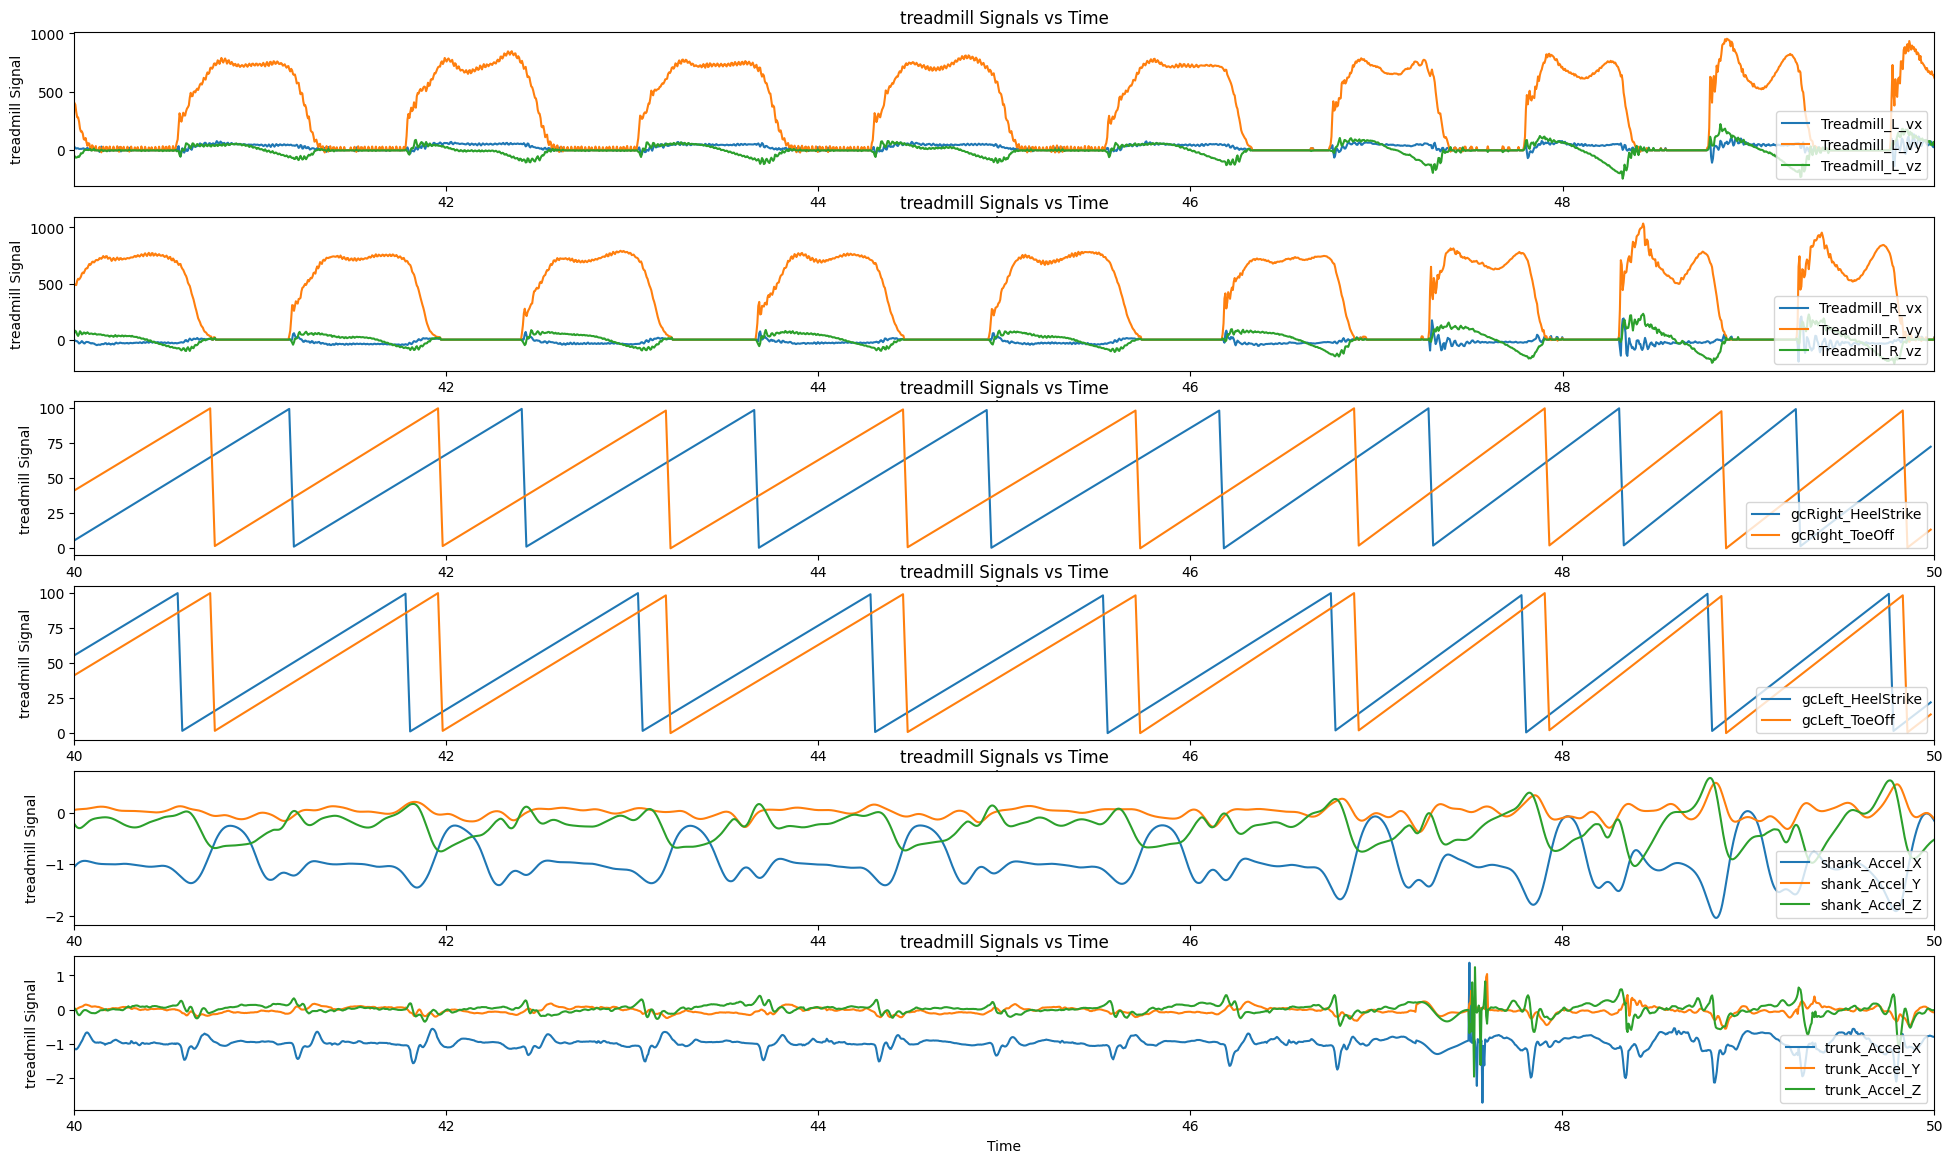

In [29]:
fig, ax = plt.subplots(6, 1, figsize=(24, 14))
plot_filtered_signals(ax[0],grf_data,40,50,locomotion='treadmill', include_columns=['Treadmill_L_v.*'], ignore_columns=[],title_prefix='treadmill')

plot_filtered_signals(ax[1],grf_data, 40,50,locomotion='treadmill', include_columns=['Treadmill_R_v.*'], ignore_columns=[],title_prefix='treadmill')

plot_filtered_signals(ax[2],imu_data, 40,50,locomotion='treadmill', include_columns=['gcRight_.*'],title_prefix='treadmill')

plot_filtered_signals(ax[3],imu_data, 40,50,locomotion='treadmill', include_columns=['gcLeft_.*'],title_prefix='treadmill')

plot_filtered_signals(ax[4],imu_data, 40,50,locomotion='treadmill', include_columns=['shank_Accel.*'],title_prefix='treadmill')

plot_filtered_signals(ax[5],imu_data, 40,50,locomotion='treadmill', include_columns=['trunk_Accel.*'],title_prefix='treadmill')
